In [1]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("nobel_prize_data.csv")
df.shape
df.isna().values.any()


np.True_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [5]:
null_columns = df.isnull().sum()
null_columns

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [6]:
null_columns = null_columns[null_columns > 0]

print(null_columns)

motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
df.columns.tolist()

['year',
 'category',
 'prize',
 'motivation',
 'prize_share',
 'laureate_type',
 'full_name',
 'birth_date',
 'birth_city',
 'birth_country',
 'birth_country_current',
 'sex',
 'organization_name',
 'organization_city',
 'organization_country',
 'ISO']

In [9]:
df.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [10]:
df.duplicated().values.any()

np.False_

In [11]:
df.isna().values.any()

np.True_

In [12]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df.loc[df.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [13]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df.loc[df.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


In [14]:
df.birth_date = pd.to_datetime(df.birth_date)
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [15]:
separated_values = df.prize_share.str.split('/', expand=True)
numerator     = pd.to_numeric(separated_values[0])
denomenator   = pd.to_numeric(separated_values[1])
df['share_pct'] = numerator / denomenator


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [17]:
import plotly.express as px
biology = df.sex.value_counts()

fig = px.pie(
    labels=biology.index,
    values=biology.values,
    title="Percentage of Male vs. Female Winners",
    names=biology.index,
    hole=0.4,
    color=biology.index,
    color_discrete_map={"Male": "#1f77b4", "Female": "#e377c2"}
)

fig.update_traces(
    textposition='inside',
    textfont_size=16,
    textinfo='label+percent',
    pull=[0.05 if i == biology.idxmax() else 0 for i in biology.index]
)

fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    showlegend=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()


In [18]:
df[df.sex == 'Female'].sort_values('year', ascending=True)[:3]
df[df.sex=="Male"].sort_values('year',ascending=True)[:3]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5


In [19]:
is_winner = df.duplicated(subset=['full_name'], keep=False)
multiple_winners = df[is_winner]

print(
    f'There are {multiple_winners.full_name.nunique()}'
    ' winners who were awarded the prize more than once.'
)


There are 6 winners who were awarded the prize more than once.


In [20]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


In [21]:
df.category.nunique()

6

In [22]:
prizes_per_category = df.category.value_counts()

v_bar = px.bar(
    x=prizes_per_category.index,
    y=prizes_per_category.values,
    color=prizes_per_category.values,
    color_continuous_scale='Aggrnyl',
    title='Number of Prizes Awarded per Category',
    labels={'x': 'Nobel Prize Category', 'y': 'Number of Prizes'},
    text=prizes_per_category.values,
)

v_bar.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Prizes: %{y}<extra></extra>'
)

v_bar.update_layout(
    title_font_size=26,
    title_x=0.5,
    xaxis_tickangle=-45,
    yaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=14),
        zeroline=False
    ),
    coloraxis_showscale=False,
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(255,255,255,1)',
    margin=dict(t=80, b=150)
)

v_bar.show()


In [23]:
df[df.category == 'Economics'].sort_values('year')[:3]
cat_men_women = df.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [24]:
v_bar_split = px.bar(
    cat_men_women,
    x='category',
    y='prize',
    color='sex',
    barmode='group',
    title='Number of Prizes Awarded per Category Split by Men and Women',
    labels={
        'category': 'Nobel Prize Category',
        'prize': 'Number of Prizes',
        'sex': 'Gender'
    },
    color_discrete_map={'Male': '#1f77b4', 'Female': '#ff7f0e'}
)

v_bar_split.update_traces(
    marker_line_width=1.5,
    marker_line_color='black',
    hovertemplate='<b>%{x}</b><br>Gender: %{legendgroup}<br>Prizes: %{y}<extra></extra>'
)

v_bar_split.update_layout(
    title_font_size=24,
    title_x=0.5,
    xaxis_tickangle=-45,
    yaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=14),
        zeroline=False
    ),
    legend=dict(
        title='Gender',
        font=dict(size=14),
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    plot_bgcolor='rgba(245,245,245,0.9)',
    paper_bgcolor='rgba(255,255,255,1)',
    margin=dict(t=90, b=150)
)

v_bar_split.show()


In [25]:
prize_per_year = df.groupby(by='year').count().prize
moving_average = prize_per_year.rolling(window=5).mean()

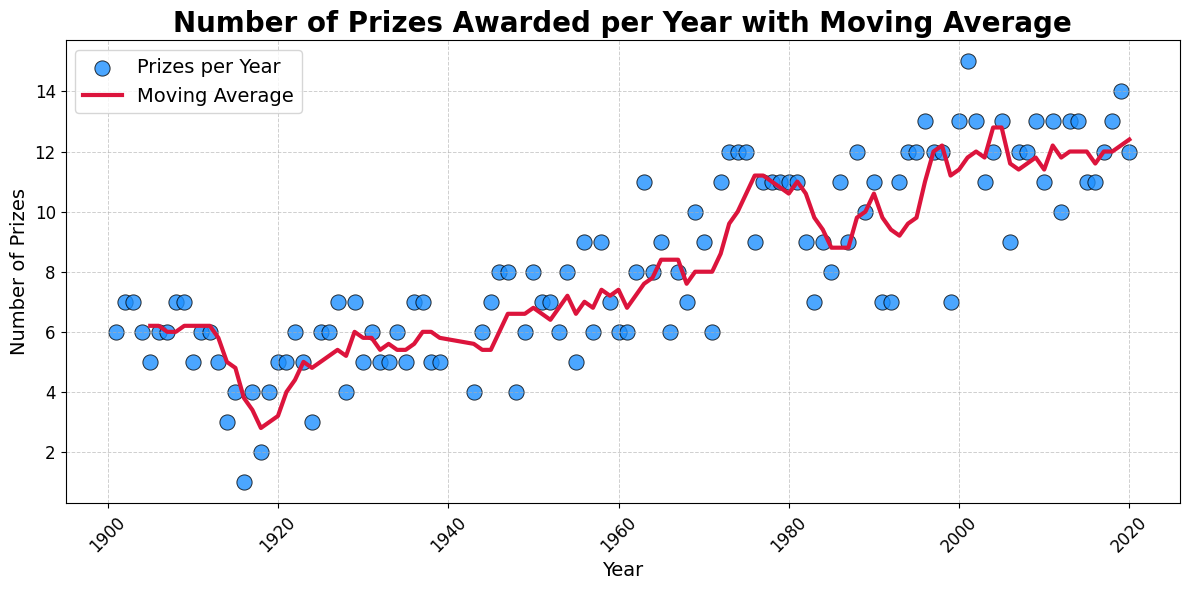

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot for prizes per year
plt.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.8,
    s=120,
    edgecolor='black',
    linewidth=0.7,
    label='Prizes per Year'
)

# Line plot for moving average
plt.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3,
    label='Moving Average'
)

# Titles and labels
plt.title('Number of Prizes Awarded per Year with Moving Average', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Prizes', fontsize=14)

# Grid and ticks
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=14)

# Tight layout for neatness
plt.tight_layout()

plt.show()


In [27]:
np.linspace(1900, 2020, 25, dtype=int)


array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

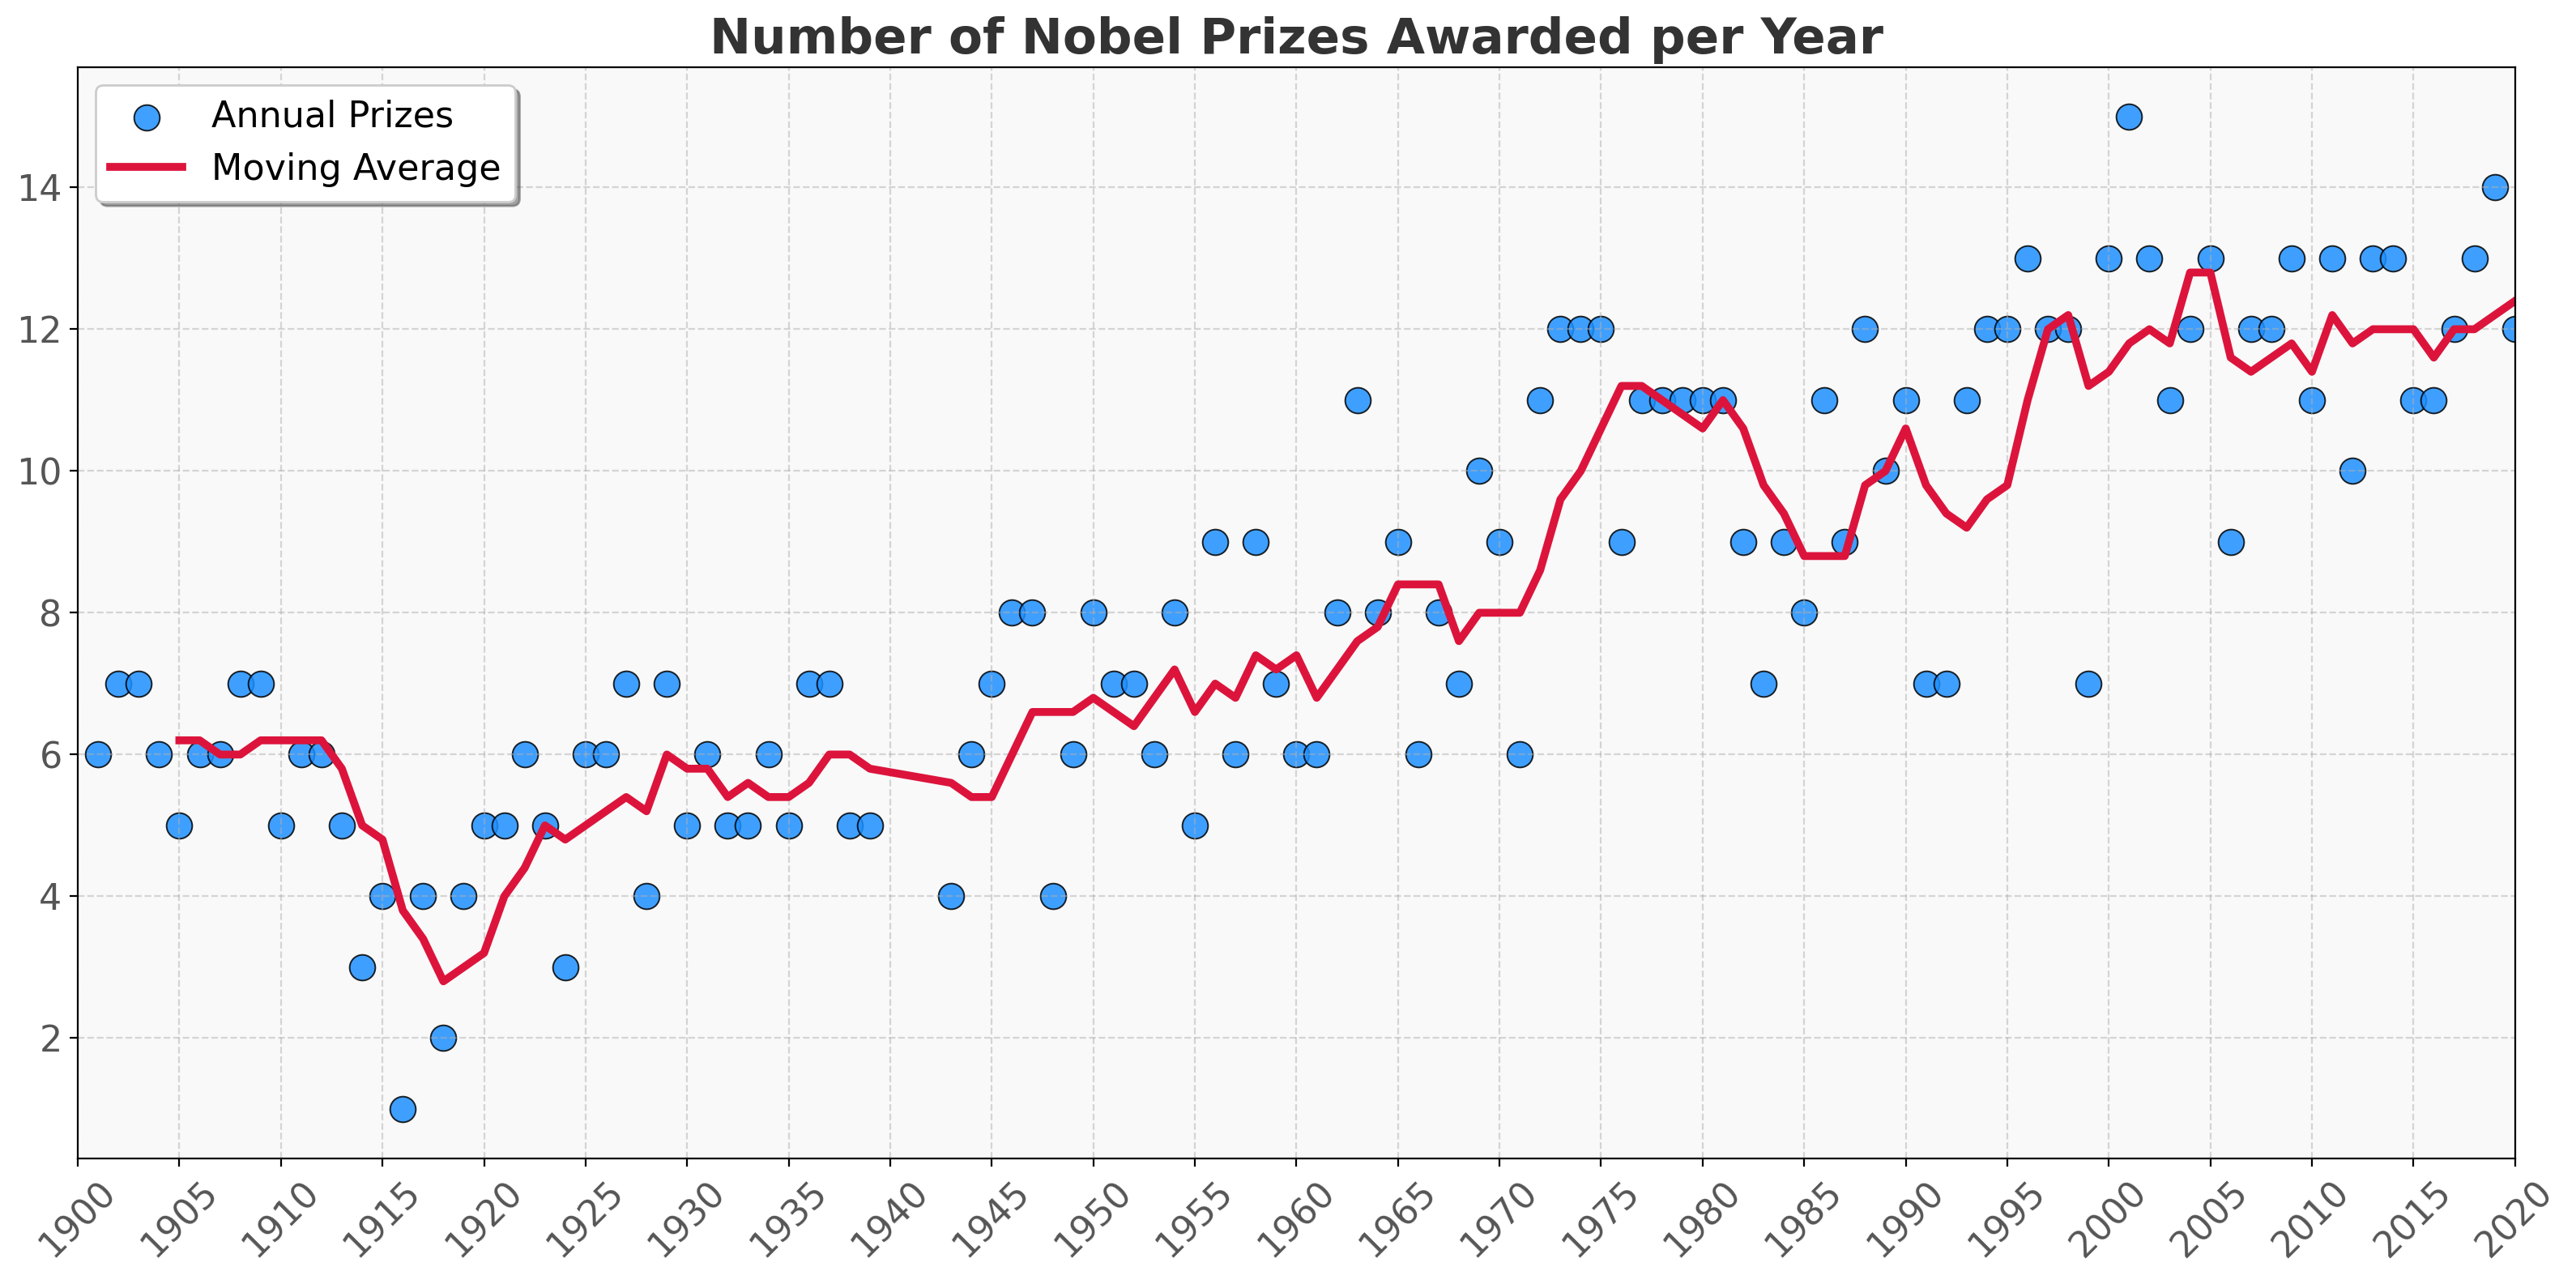

In [28]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=22, fontweight='bold', color='#333333')
plt.yticks(fontsize=16, color='#555555')
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=16,
    rotation=45,
    color='#555555'
)

ax = plt.gca()
ax.set_xlim(1900, 2020)
ax.set_facecolor('#f9f9f9')
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.8, alpha=0.5)

ax.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.85,
    s=130,
    edgecolors='black',
    linewidths=0.7,
    label='Annual Prizes'
)

ax.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3.5,
    label='Moving Average'
)

ax.legend(fontsize=16, frameon=True, shadow=True, loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
yearly_avg_share = df.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

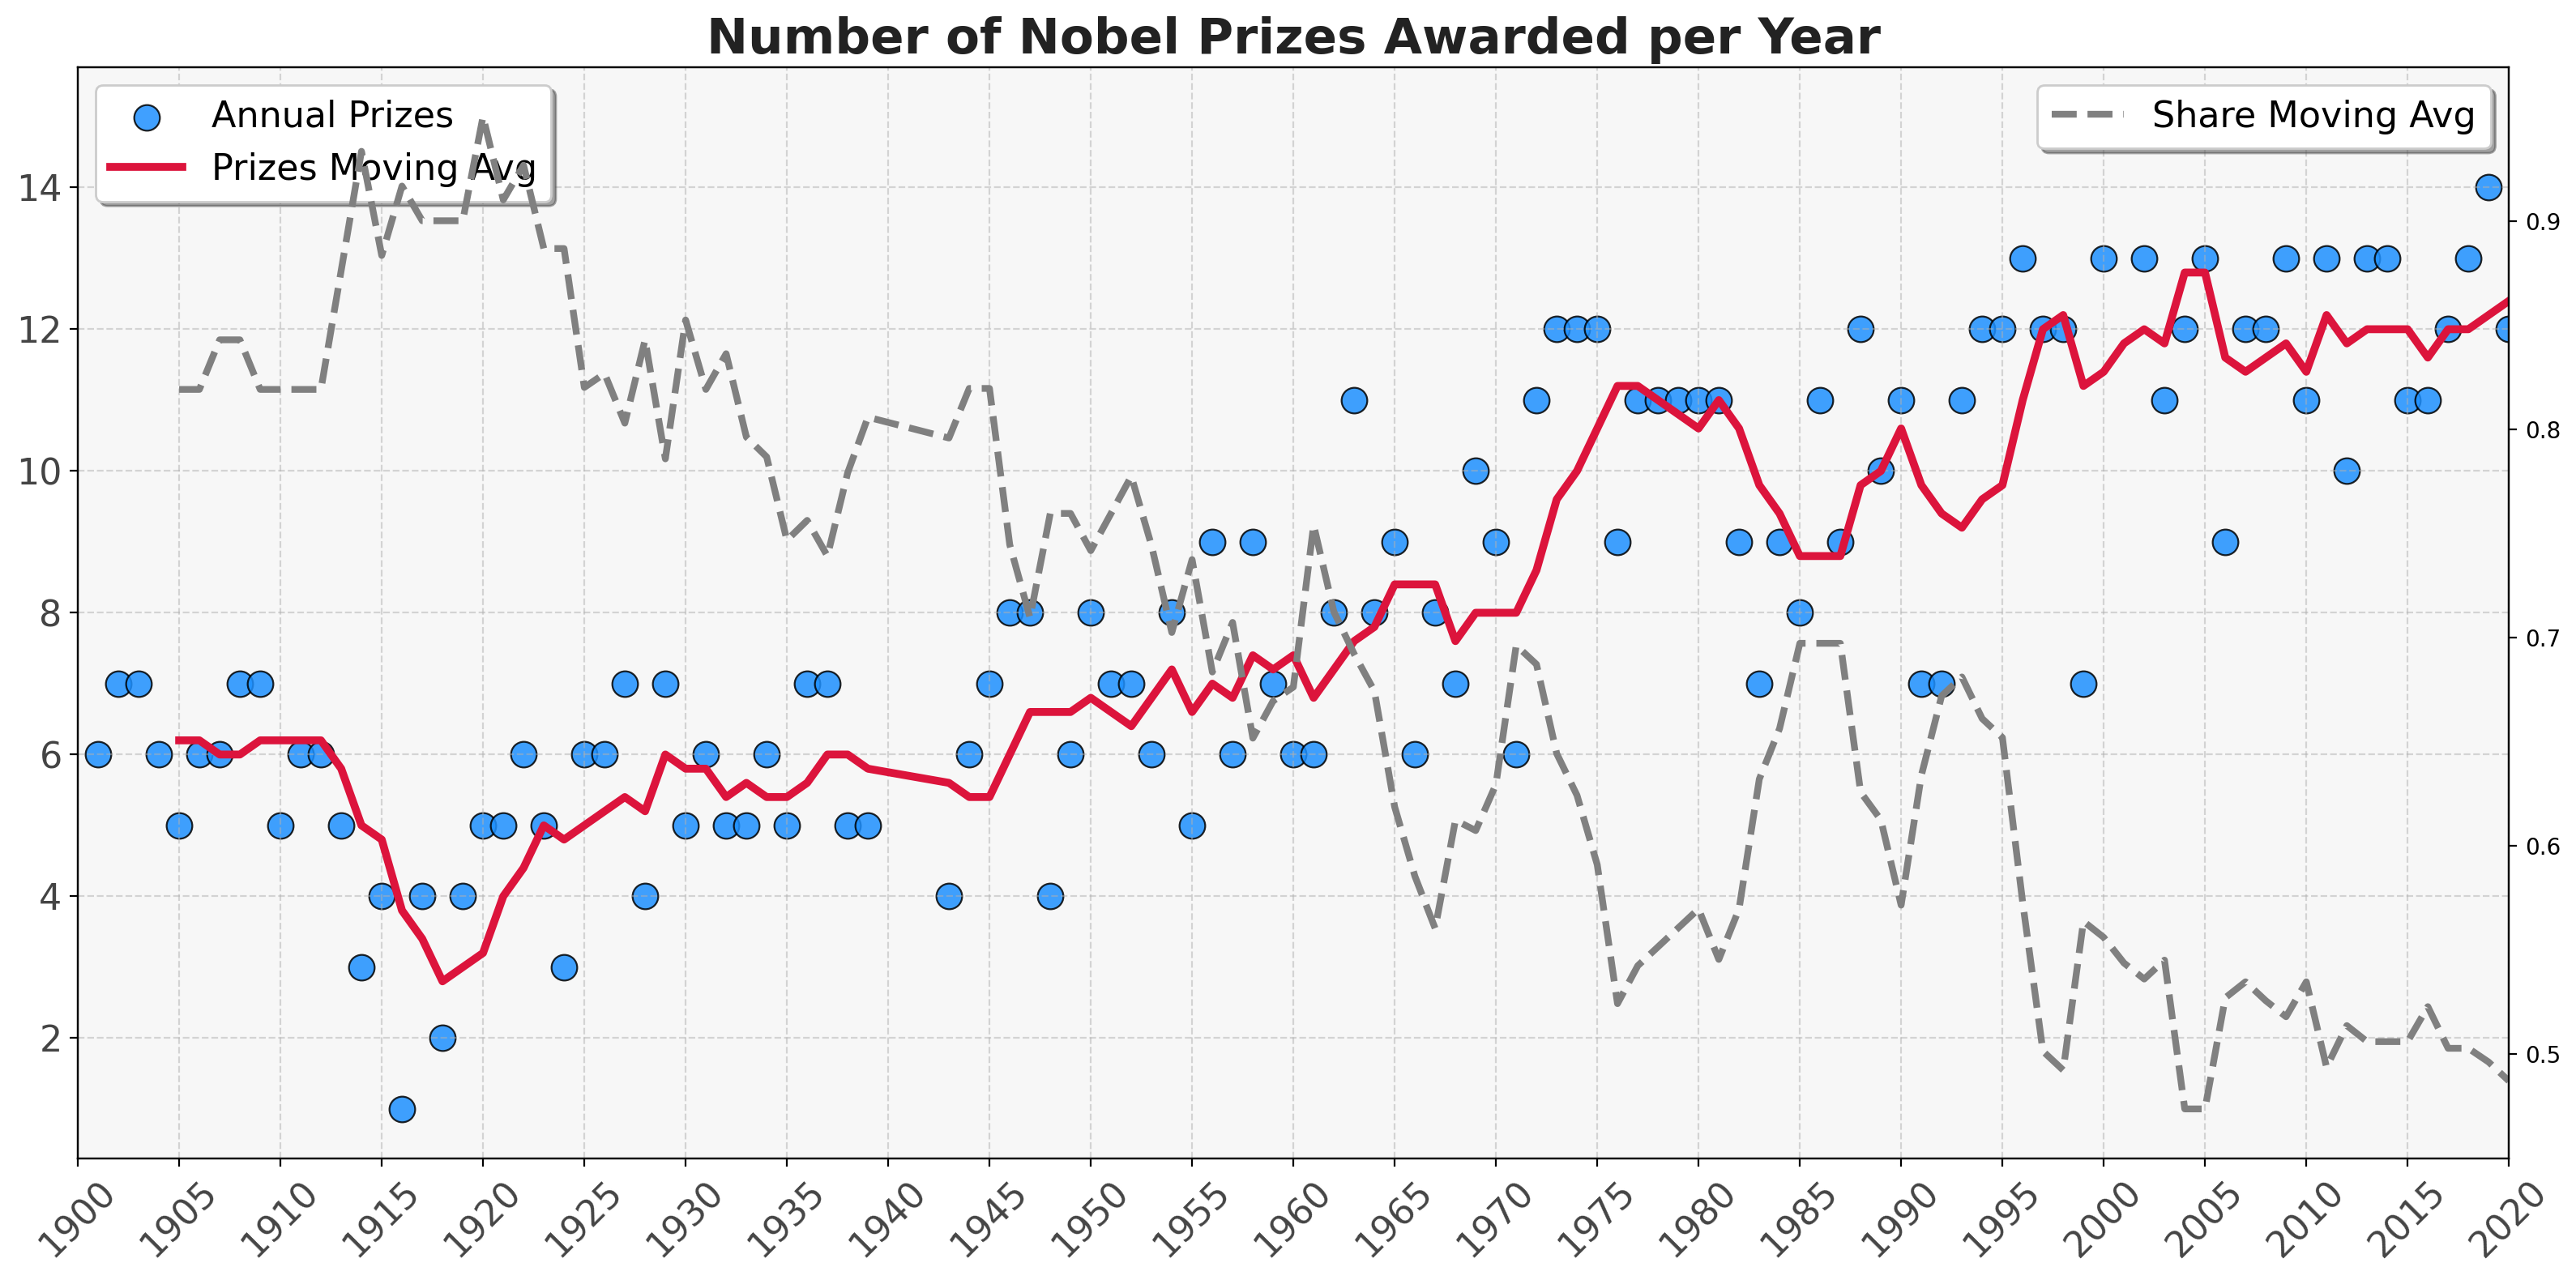

In [30]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=22, fontweight='bold', color='#222222')
plt.yticks(fontsize=16, color='#444444')
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=16,
    rotation=45,
    color='#444444'
)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax1.set_facecolor('#f7f7f7')
ax1.grid(True, linestyle='--', linewidth=0.8, alpha=0.5)

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.85,
    s=130,
    edgecolors='black',
    linewidths=0.8,
    label='Annual Prizes'
)

ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3.5,
    label='Prizes Moving Avg'
)

ax2.plot(
    prize_per_year.index,
    share_moving_average.values,
    c='grey',
    linewidth=3,
    linestyle='--',
    label='Share Moving Avg'
)

ax1.legend(loc='upper left', fontsize=16, frameon=True, shadow=True)
ax2.legend(loc='upper right', fontsize=16, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


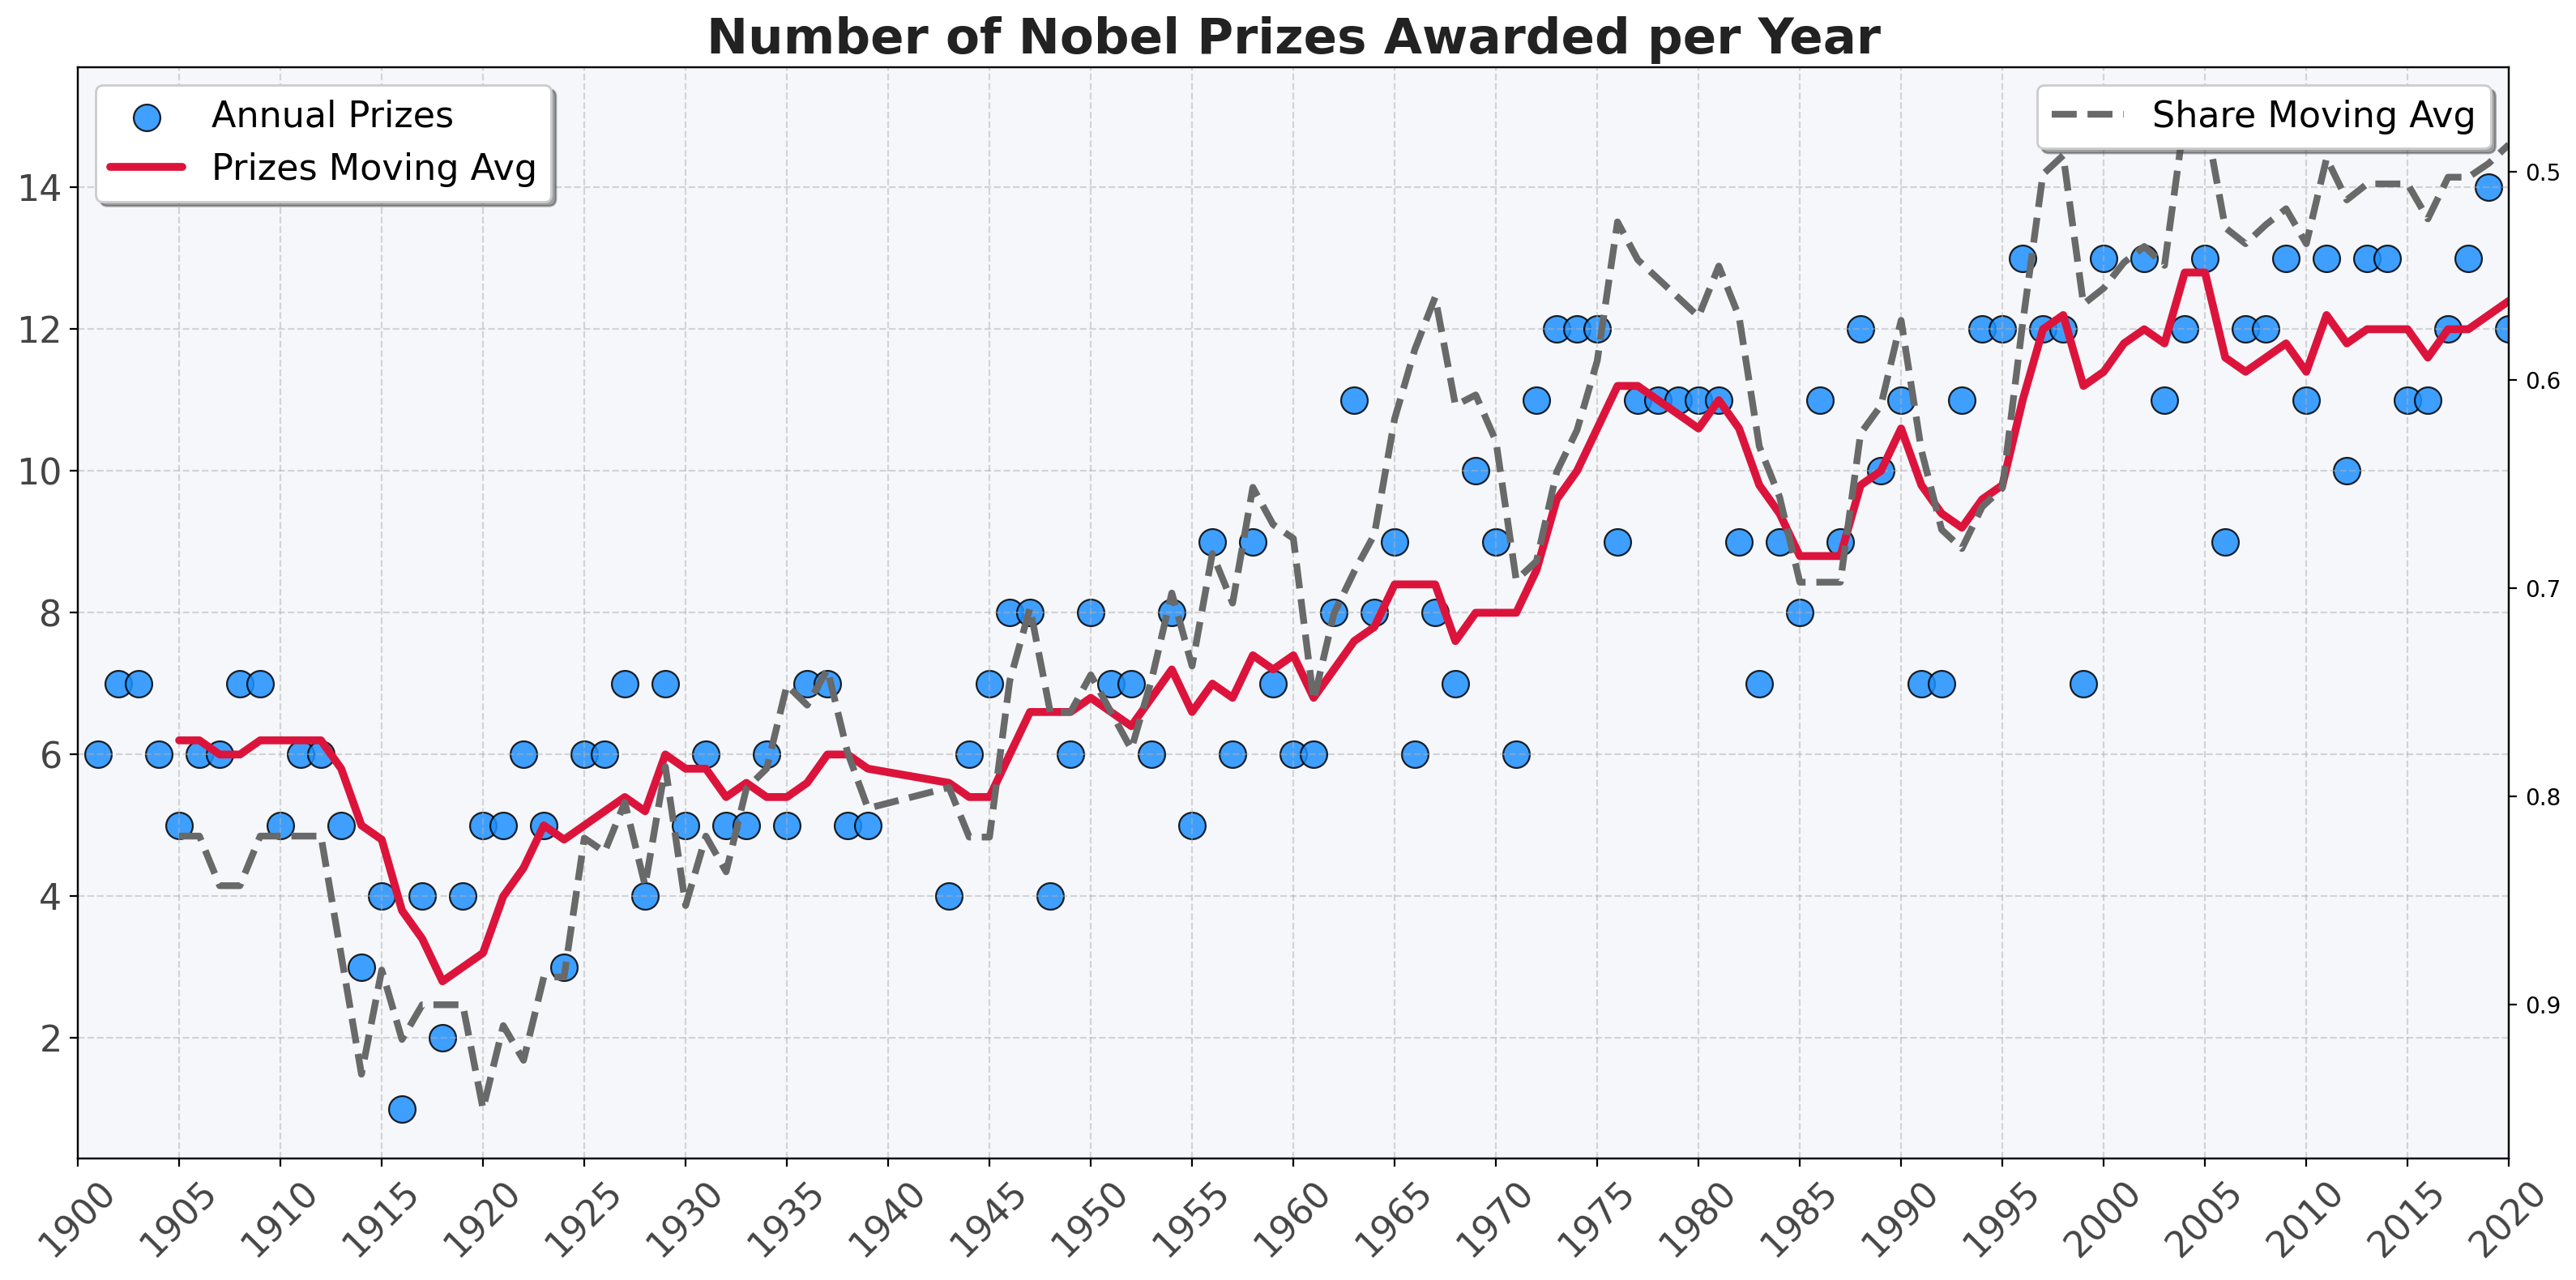

In [31]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=22, fontweight='bold', color='#222222')
plt.yticks(fontsize=16, color='#444444')
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=16,
    rotation=45,
    color='#444444'
)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.set_facecolor('#f5f7fa')
ax1.grid(True, linestyle='--', linewidth=0.8, alpha=0.5)

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.85,
    s=140,
    edgecolors='black',
    linewidths=0.8,
    label='Annual Prizes'
)

ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3.5,
    label='Prizes Moving Avg',
    solid_capstyle='round'
)

ax2.plot(
    prize_per_year.index,
    share_moving_average.values,
    c='dimgray',
    linewidth=3,
    linestyle='--',
    label='Share Moving Avg',
    solid_capstyle='round'
)

ax1.legend(loc='upper left', fontsize=16, frameon=True, shadow=True)
ax2.legend(loc='upper right', fontsize=16, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


In [32]:
top_countries = df.groupby(['birth_country_current'],
                                  as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [33]:
h_bar = px.bar(
    top20_countries,
    x='prize',
    y='birth_country_current',
    orientation='h',
    color='prize',
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Nobel Prizes',
    labels={'prize': 'Number of Prizes', 'birth_country_current': 'Country'},
    text='prize',
)

h_bar.update_traces(
    texttemplate='%{text}',
    textposition='outside',
    marker_line_color='black',
    marker_line_width=1,
    hovertemplate='<b>%{y}</b><br>Prizes: %{x}<extra></extra>'
)

h_bar.update_layout(
    title_font_size=24,
    title_x=0.5,
    xaxis=dict(
        title='Number of Prizes',
        showgrid=True,
        gridcolor='lightgrey',
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Country',
        autorange='reversed',
        tickfont=dict(size=14)
    ),
    coloraxis_showscale=False,
    margin=dict(l=120, r=40, t=80, b=40),
    plot_bgcolor='rgba(245,245,245,0.9)',
    paper_bgcolor='white'
)

h_bar.show()


In [34]:
df_countries = df.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
63,Slovakia,SVK,1
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [35]:
world_map = px.choropleth(
    df_countries,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter,
    title='Nobel Prizes by Country',
    labels={'prize': 'Number of Prizes'},
    projection='natural earth',
)

world_map.update_layout(
    title_font_size=24,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='LightGray',
        landcolor='whitesmoke',
        lakecolor='LightBlue',
    ),
    coloraxis_colorbar=dict(
        title='Number of Prizes',
        tickvals=[df_countries.prize.min(), df_countries.prize.max()],
        len=0.6,
        thickness=15,
        outlinewidth=1,
        outlinecolor='black',
        ticks='outside',
        tickfont=dict(size=12)
    ),
    margin=dict(t=80, b=0, l=0, r=0),
    paper_bgcolor='white',
)

world_map.show()


In [36]:
cat_country = df.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [37]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

In [38]:
cat_cntry_bar = px.bar(
    merged_df,
    x='cat_prize',
    y='birth_country_current',
    color='category',
    orientation='h',
    title='Top 20 Countries by Number of Nobel Prizes and Category',
    labels={'cat_prize': 'Number of Prizes', 'birth_country_current': 'Country', 'category': 'Category'},
    color_discrete_sequence=px.colors.qualitative.Bold,
    text='cat_prize'
)

cat_cntry_bar.update_traces(
    textposition='outside',
    marker_line_color='black',
    marker_line_width=1.2,
    hovertemplate='<b>%{y}</b><br>Category: %{legendgroup}<br>Prizes: %{x}<extra></extra>'
)

cat_cntry_bar.update_layout(
    title_font_size=24,
    title_x=0.5,
    xaxis=dict(
        title='Number of Prizes',
        showgrid=True,
        gridcolor='lightgray',
        tickfont=dict(size=13)
    ),
    yaxis=dict(
        title='Country',
        tickfont=dict(size=13),
        autorange='reversed'
    ),
    legend=dict(
        title='Category',
        font=dict(size=13),
        orientation='v',
        y=1.02,
        x=1,
        xanchor='right',
        yanchor='bottom'
    ),
    plot_bgcolor='rgba(248,248,255,1)',
    paper_bgcolor='white',
    margin=dict(l=120, r=40, t=80, b=40)
)

cat_cntry_bar.show()


In [39]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [40]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [41]:
l_chart = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current',
    title='Cumulative Nobel Prizes Over Time by Country',
    labels={'year': 'Year', 'prize': 'Cumulative Prizes', 'birth_country_current': 'Country'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

l_chart.update_traces(
    mode='lines',
    line=dict(width=3),
    hovertemplate='<b>%{hovertext}</b><br>Year: %{x}<br>Prizes: %{y}<extra></extra>'
)

l_chart.update_layout(
    title_font_size=24,
    title_x=0.5,
    xaxis=dict(
        title='Year',
        tickfont=dict(size=13),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='Number of Prizes',
        tickfont=dict(size=13),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    legend=dict(
        title='Country',
        font=dict(size=12),
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    ),
    plot_bgcolor='rgba(250,250,250,1)',
    paper_bgcolor='white',
    margin=dict(t=80, b=60, l=60, r=60)
)

l_chart.show()


In [42]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [43]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

In [44]:
top20_org_cities = df.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

In [45]:
country_city_org = df.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)

In [46]:
burst = px.sunburst(
    country_city_org,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Where Do Nobel Discoveries Take Place?',
    color='prize',
    color_continuous_scale=px.colors.sequential.Magma,
    maxdepth=-1
)

burst.update_traces(
    insidetextfont=dict(size=14, color='white'),
    hovertemplate='<b>%{label}</b><br>Prizes: %{value}<extra></extra>'
)

burst.update_layout(
    title_font_size=26,
    title_x=0.5,
    margin=dict(t=80, l=20, r=20, b=20),
    paper_bgcolor='white',
    plot_bgcolor='white',
    uniformtext=dict(minsize=12, mode='hide'),
    coloraxis_showscale=False
)

burst.show()


In [47]:
birth_years = df.birth_date.dt.year
df['winning_age'] = df.year - birth_years
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


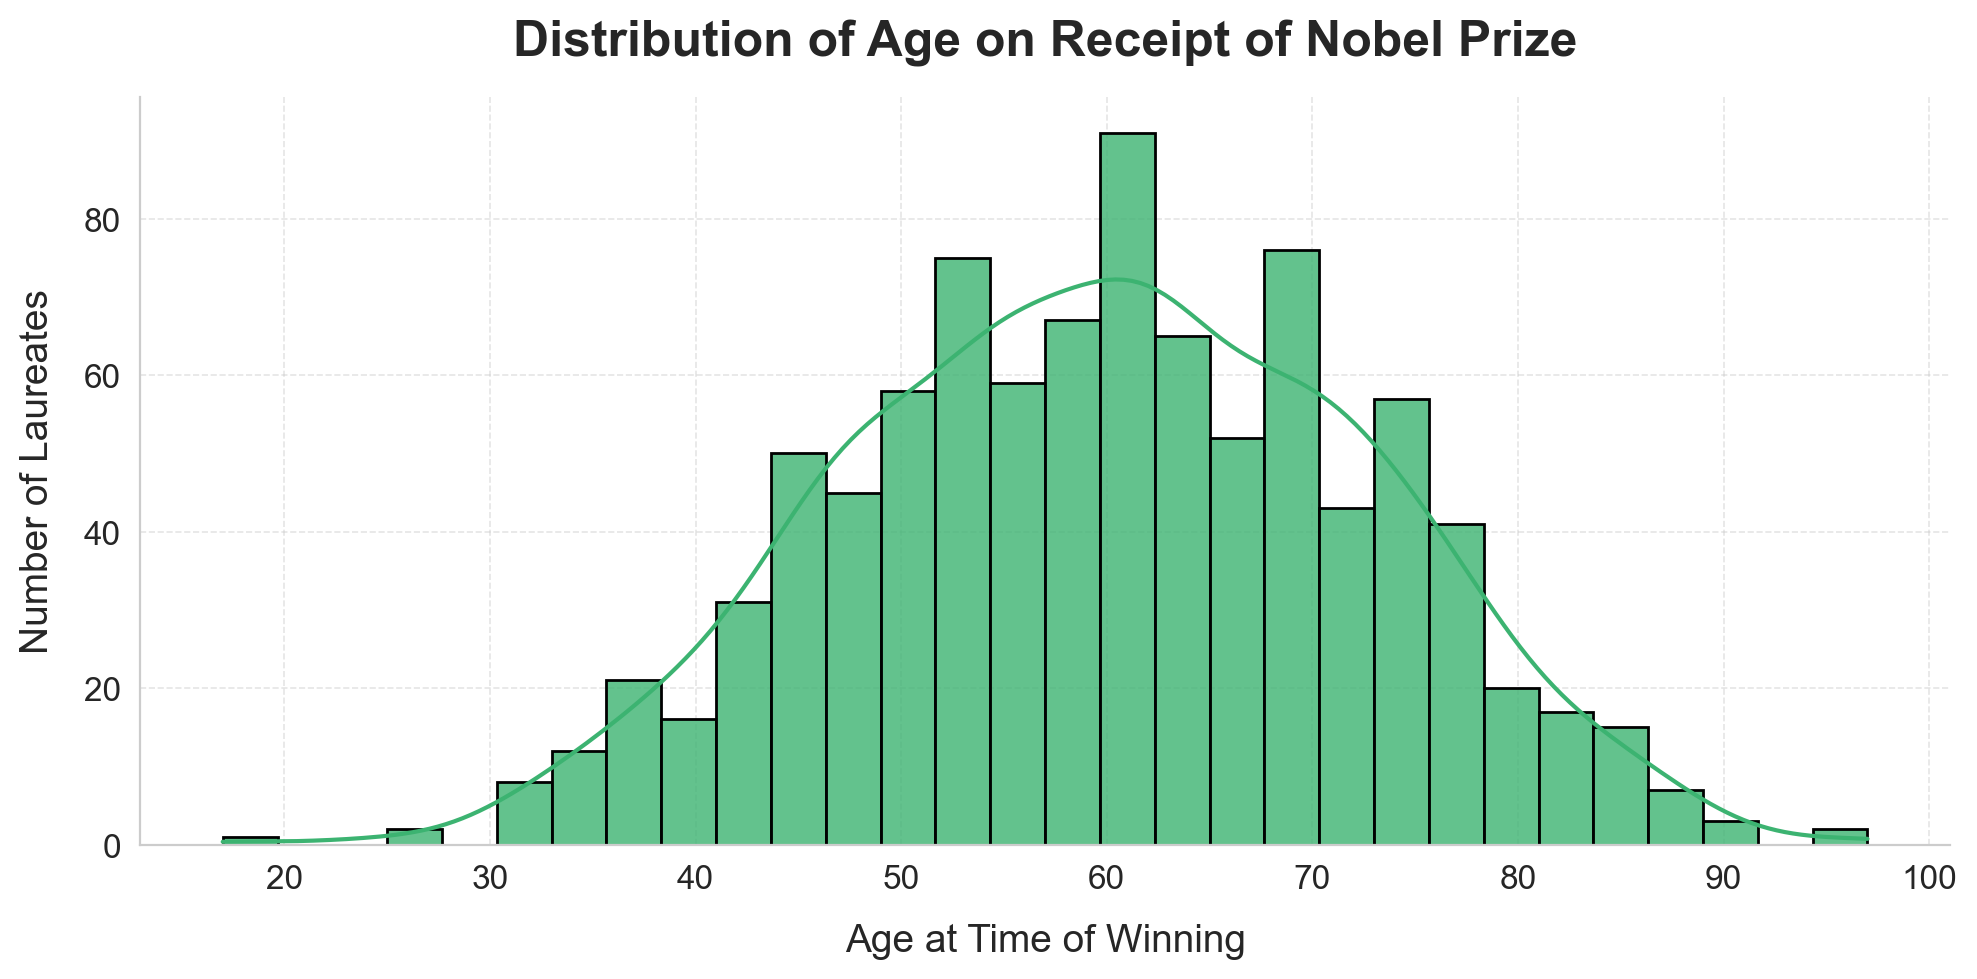

In [48]:
import seaborn as sns
plt.figure(figsize=(10, 5), dpi=200)

sns.set_style("whitegrid")
sns.histplot(
    data=df,
    x='winning_age',
    bins=30,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.8,
    kde=True
)

plt.xlabel('Age at Time of Winning', fontsize=14, labelpad=10)
plt.ylabel('Number of Laureates', fontsize=14, labelpad=10)
plt.title('Distribution of Age on Receipt of Nobel Prize', fontsize=18, fontweight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.6, alpha=0.5)

sns.despine()
plt.tight_layout()
plt.show()


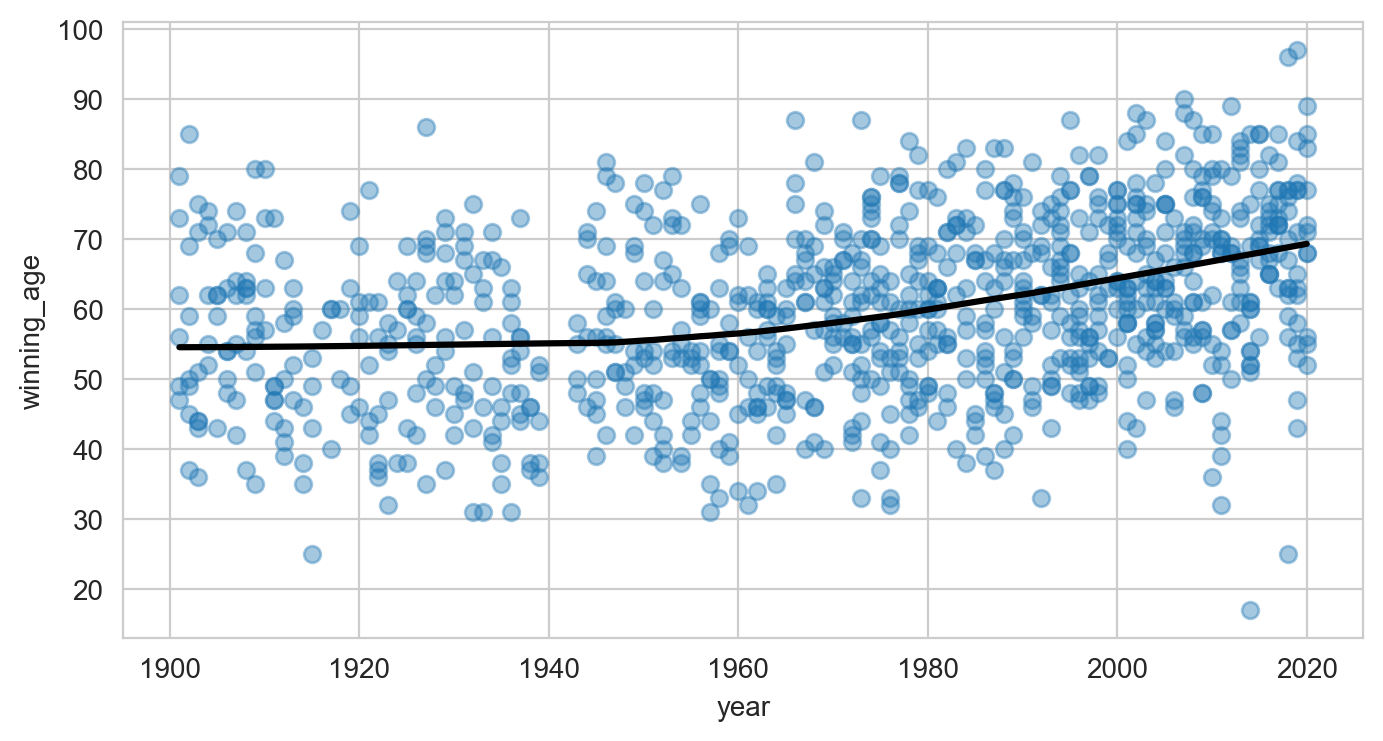

In [49]:

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()


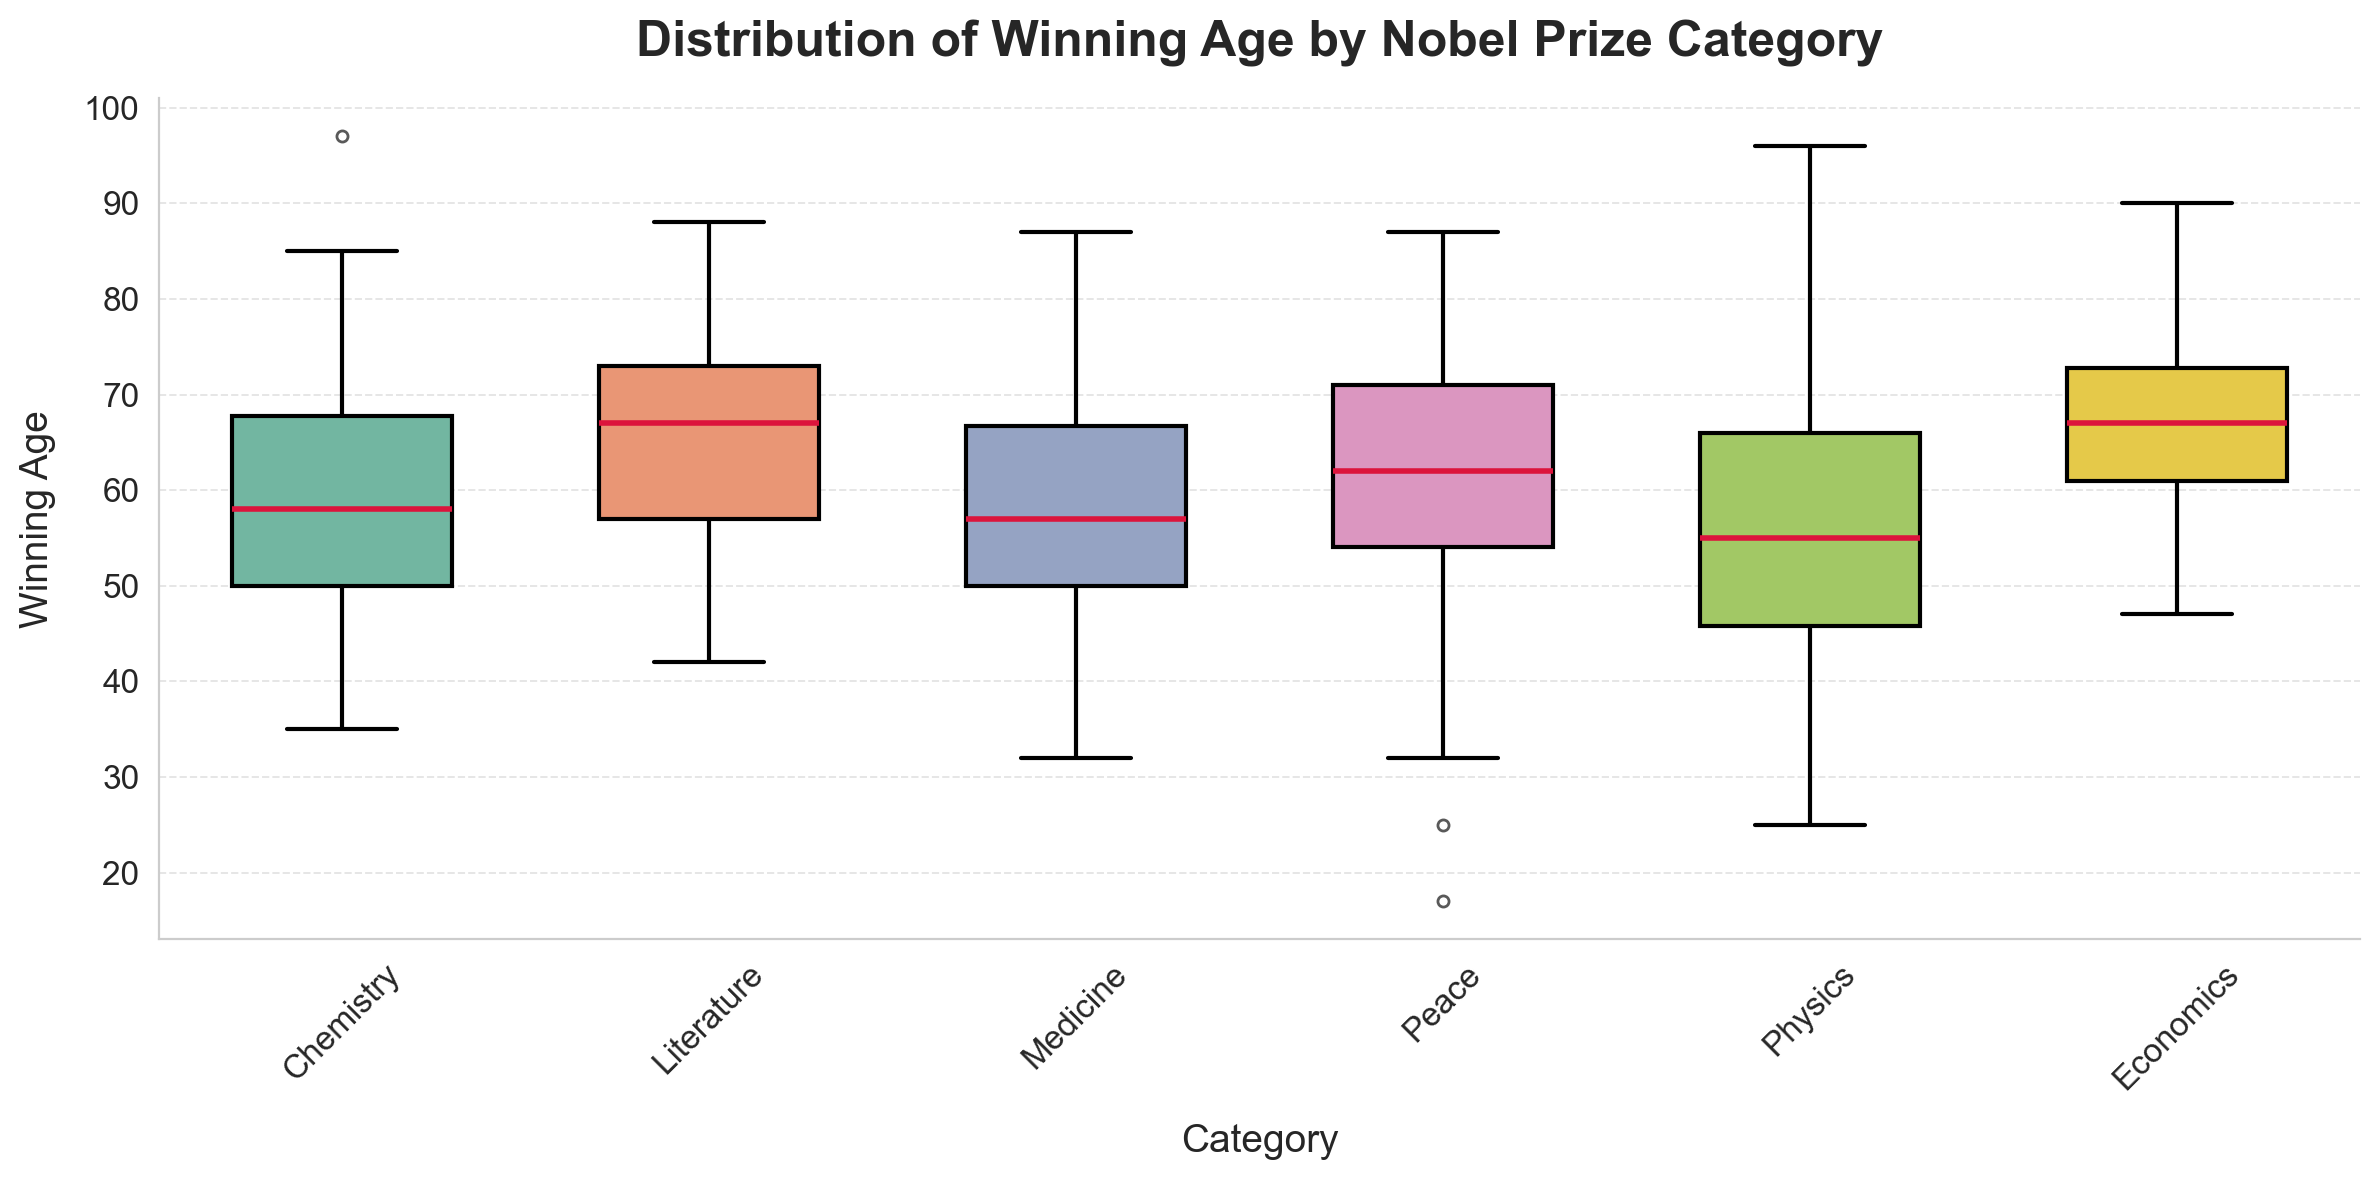

In [50]:
plt.figure(figsize=(12, 6), dpi=200)

sns.set_style("whitegrid")

sns.boxplot(
    data=df,
    x='category',
    y='winning_age',
    hue='category',  
    palette='Set2',
    legend=False,    
    linewidth=1.5,
    width=0.6,
    fliersize=4,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='crimson', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

plt.title('Distribution of Winning Age by Nobel Prize Category', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Category', fontsize=14, labelpad=10)
plt.ylabel('Winning Age', fontsize=14, labelpad=10)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

sns.despine()
plt.tight_layout()
plt.show()


In [51]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


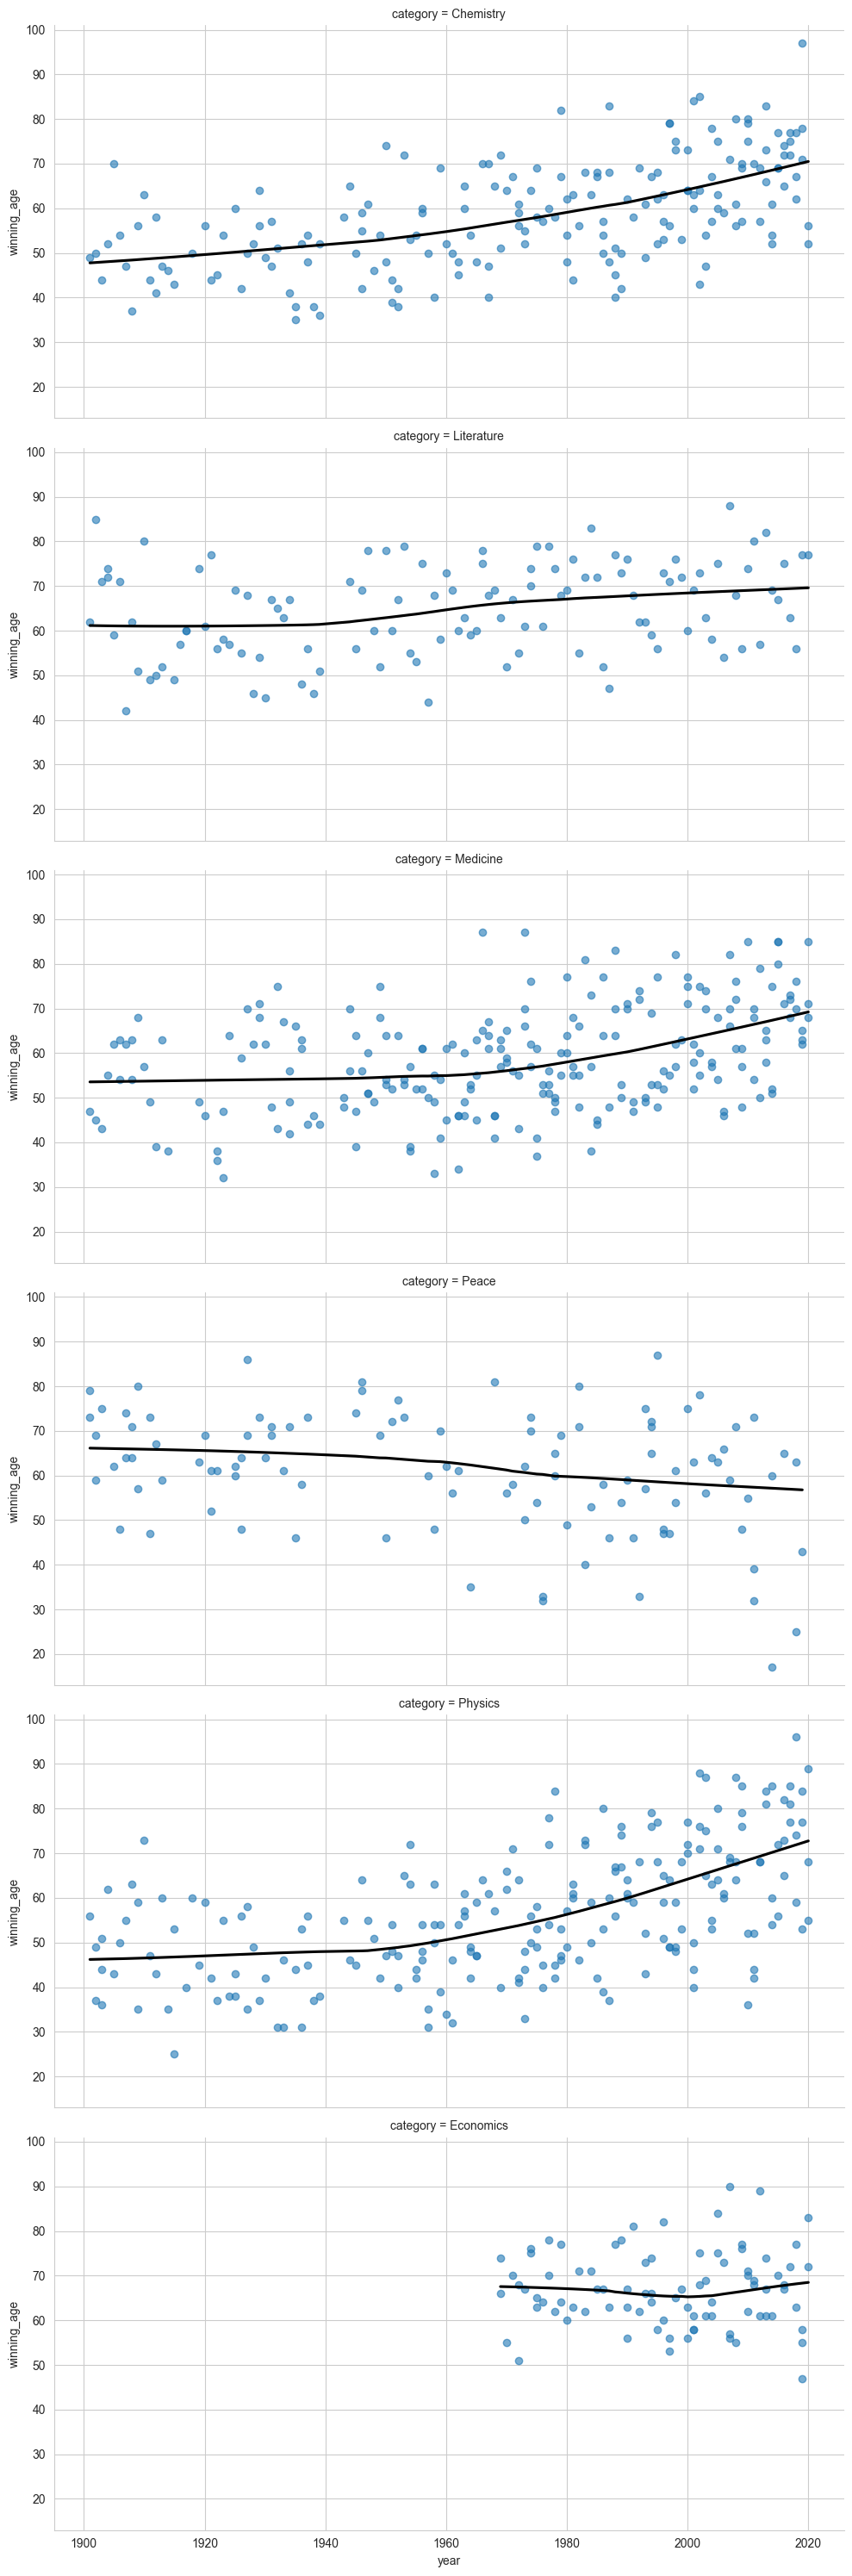

In [53]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               row = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()


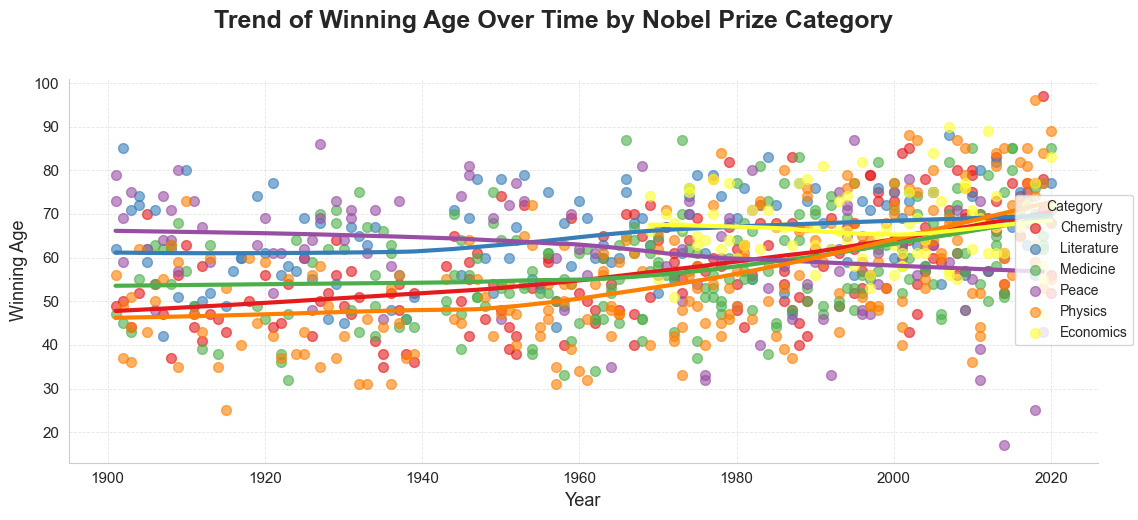

In [54]:
sns.set_style("whitegrid")

g = sns.lmplot(
    data=df,
    x='year',
    y='winning_age',
    hue='category',
    lowess=True,
    aspect=2,
    height=5,
    palette='Set1',
    scatter_kws={'alpha': 0.6, 's': 50},
    line_kws={'linewidth': 3}
)

g.set_axis_labels("Year", "Winning Age", fontsize=13)
g.fig.suptitle("Trend of Winning Age Over Time by Nobel Prize Category", fontsize=18, fontweight='bold', y=1.03)

for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.5)
    ax.tick_params(labelsize=11)

g._legend.set_title("Category")
g._legend.set_bbox_to_anchor((1.02, 0.5))
g._legend.set_frame_on(True)

sns.despine()
plt.tight_layout()
plt.show()
